## this is just a demo to show albumentaiton effects


author: dreamer
date: 20201119


In [35]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from urllib.request import urlopen

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

# 用于图片上的边界框和类别 labels 的可视化函数
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35, TEXT_COLOR,
                lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
#     plt.imshow()


对于检测问题，必须以指定格式定义 bbox_params. 支持的格式有两种： coco 和 pascal_voc.

coco 的 bounding box 格式为：[x_min, y_min, width, height], e.g. [97, 12, 150, 200].

pascal_voc 的 bounding box 格式为： [x_min, y_min, x_max, y_max], e.g. [97, 12, 247, 212].

In [36]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={'format': 'coco', 'min_area': min_area, 'min_visibility': min_visibility, 'label_fields': ['category_id']})


def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

image = download_image('http://images.cocodataset.org/train2017/000000386298.jpg')

# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [[366.7, 80.84, 132.8, 181.84], [5.66, 138.95, 147.09, 164.88]], 'category_id': [18, 17]}
category_id_to_name = {17: 'cat', 18: 'dog'}

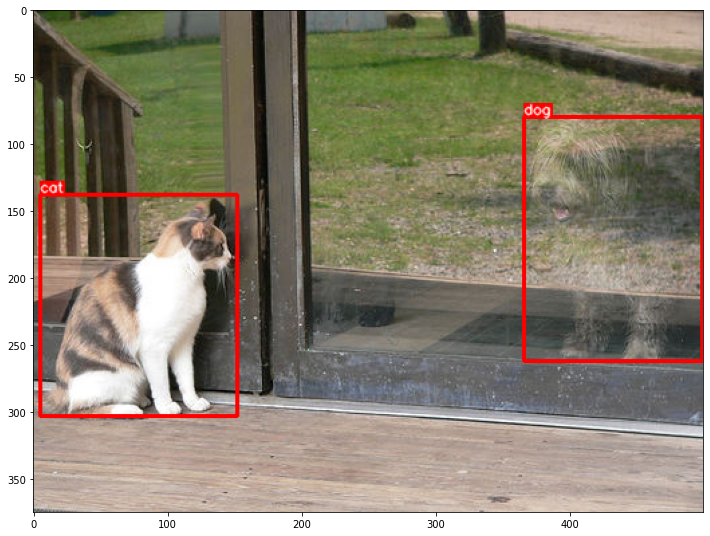

In [37]:
# img_path = '/home/dreamer/workspace/RongWen/data/Processing/VOCdevkit/VOC2012/decode/add/jpgs/1605680612_8946.jpg'

visualize(annotations, category_id_to_name)

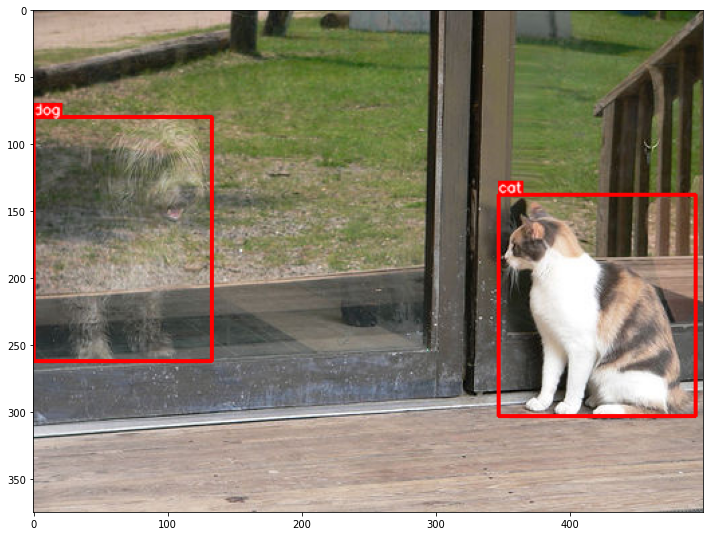

In [38]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

In [39]:
import pandas as pd
img_path = '/home/dreamer/workspace/RongWen/data/Processing/VOCdevkit/VOC2012/decode/add/jpgs/1605680612_8946.jpg'
anno_path = '/home/dreamer/workspace/RongWen/scripts/rongwen20201117.csv'
anno_csv = pd.read_csv(anno_path)
img_id = img_path.split('/')[-1].split('.')[0]

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [40]:
anno_csv.head()

image_id  width  height                         bbox        source
0     1605680608_120   1886    1070  [275.0, 140.0, 186.0, 54.0]         fence
1     1605680608_120   1886    1070     [8.0, 178.0, 34.0, 48.0]  traffic cone
2     1605680608_120   1886    1070    [40.0, 160.0, 36.0, 45.0]  traffic cone
3  1605680612_180182    954     531    [505.0, 94.0, 14.0, 19.0]  traffic cone
4  1605680612_180182    954     531    [590.0, 94.0, 14.0, 18.0]  traffic cone

In [41]:
anno_csv[anno_csv['image_id']==img_id]['bbox']

57     [224.0, 449.0, 52.0, 87.0]
58    [1461.0, 854.0, 25.0, 37.0]
59    [1635.0, 843.0, 21.0, 34.0]
60    [1659.0, 831.0, 16.0, 31.0]
61    [1574.0, 825.0, 60.0, 37.0]
62     [490.0, 627.0, 18.0, 26.0]
63     [598.0, 625.0, 14.0, 18.0]
64     [552.0, 610.0, 41.0, 25.0]
Name: bbox, dtype: object

In [42]:
bbox = [box[1:-1].split(',') for box in anno_csv[anno_csv['image_id']==img_id]['bbox']]
#     print(box[1:-1])
#     print(box[1:-1].split(','))
#     for b in box:
bbox

[['224.0', ' 449.0', ' 52.0', ' 87.0'],
 ['1461.0', ' 854.0', ' 25.0', ' 37.0'],
 ['1635.0', ' 843.0', ' 21.0', ' 34.0'],
 ['1659.0', ' 831.0', ' 16.0', ' 31.0'],
 ['1574.0', ' 825.0', ' 60.0', ' 37.0'],
 ['490.0', ' 627.0', ' 18.0', ' 26.0'],
 ['598.0', ' 625.0', ' 14.0', ' 18.0'],
 ['552.0', ' 610.0', ' 41.0', ' 25.0']]

In [43]:
a_bbox = [] 
for box in anno_csv[anno_csv['image_id']==img_id]['bbox']:
    print(box)
    temp = box[1:-1].split(',')
    temp = [float(i) for i in temp]
    a_bbox.append(temp)
a_bbox

[224.0, 449.0, 52.0, 87.0]
[1461.0, 854.0, 25.0, 37.0]
[1635.0, 843.0, 21.0, 34.0]
[1659.0, 831.0, 16.0, 31.0]
[1574.0, 825.0, 60.0, 37.0]
[490.0, 627.0, 18.0, 26.0]
[598.0, 625.0, 14.0, 18.0]
[552.0, 610.0, 41.0, 25.0]


[[224.0, 449.0, 52.0, 87.0],
 [1461.0, 854.0, 25.0, 37.0],
 [1635.0, 843.0, 21.0, 34.0],
 [1659.0, 831.0, 16.0, 31.0],
 [1574.0, 825.0, 60.0, 37.0],
 [490.0, 627.0, 18.0, 26.0],
 [598.0, 625.0, 14.0, 18.0],
 [552.0, 610.0, 41.0, 25.0]]

In [44]:
labels = list(anno_csv[anno_csv['image_id']==img_id]['source'])
label_dict = {'traffic cone': 1, 'fence': 2}

labels = [label_dict[label] for label in labels]
labels

[1, 1, 1, 1, 2, 1, 1, 2]

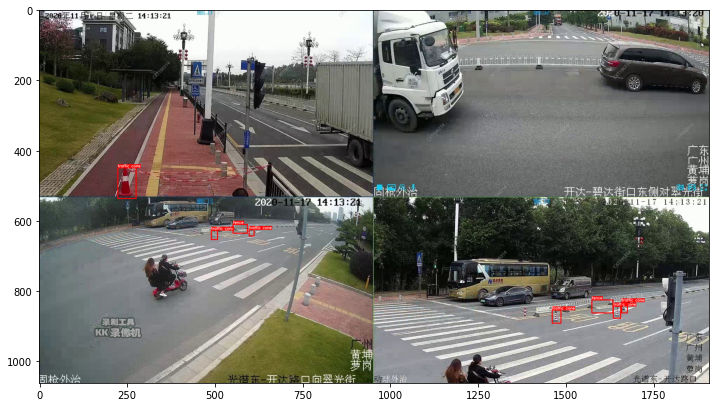

In [45]:
label_id_to_name = {1: 'traffic cone', 2: 'fence'}
annos = {'image': image, 'bboxes': a_bbox, 'category_id': labels}
# annotations = {'image': image, 'bboxes': [[366.7, 80.84, 132.8, 181.84], [5.66, 138.95, 147.09, 164.88]], 'category_id': [18, 17]}
visualize(annos, label_id_to_name)

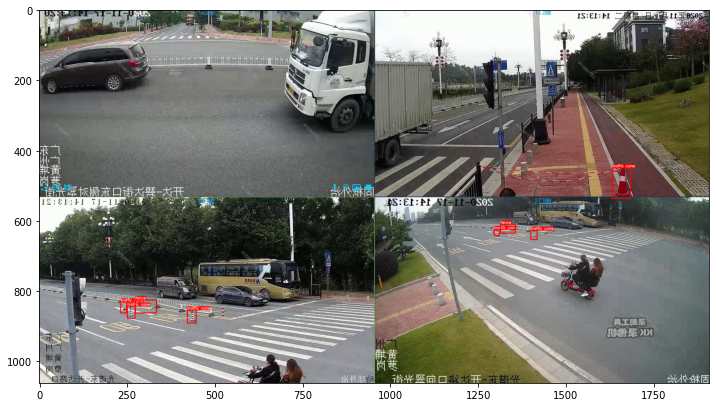

In [46]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annos)
visualize(augmented, label_id_to_name)

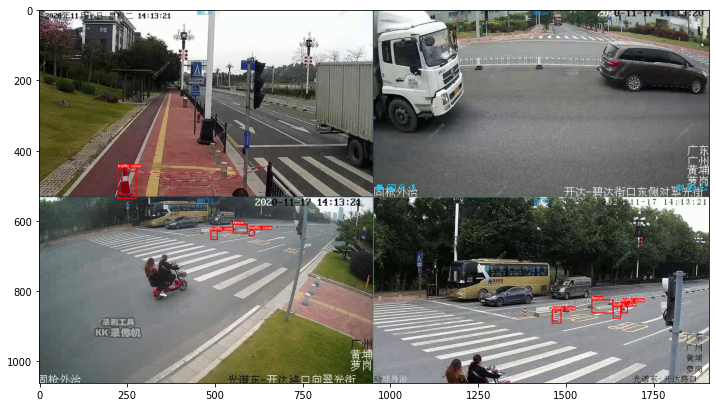

In [47]:
from albumentations import ShiftScaleRotate
aug1 = get_aug([ShiftScaleRotate()])
augmented1 = aug1(**annos)
visualize(augmented1, label_id_to_name)

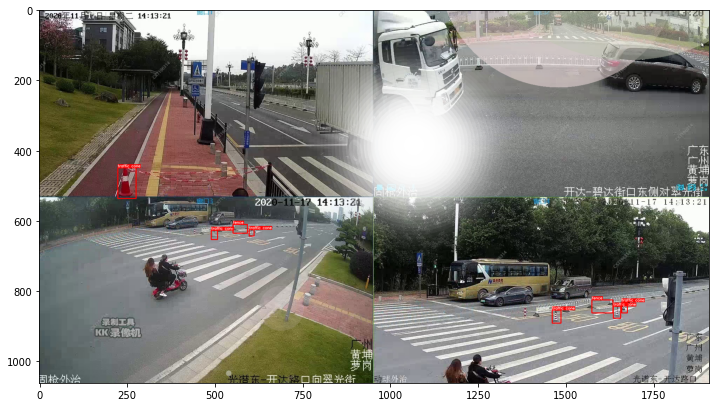

In [48]:
from albumentations import RandomSunFlare
aug2 = get_aug([RandomSunFlare(p=1)])
augmented2 = aug2(**annos)
visualize(augmented2, label_id_to_name)

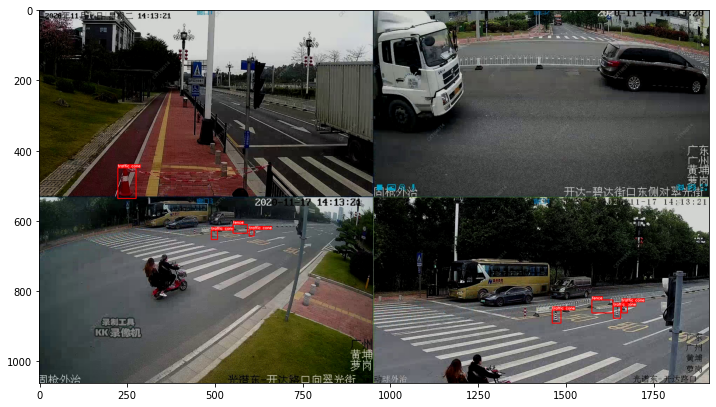

In [49]:

from albumentations import RandomBrightness
aug3 = get_aug([RandomBrightness(p=1)])
augmented3 = aug3(**annos)
visualize(augmented3, label_id_to_name)


In [ ]:

from albumentations import MedianBlur
aug3 = get_aug([MedianBlur(p=1)])
augmented3 = aug3(**annos)
visualize(augmented3, label_id_to_name)


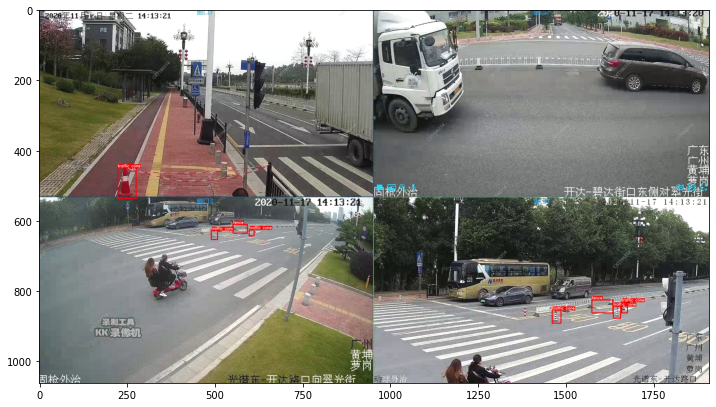